# Old substation list

In [ ]:
setwd("C:/Users/Hoang Tran/Projects/substation/substation-web-services/substation-train-predict")
#####Main code
library(parallel)
library(foreach)
library(RCurl)
source(file.path(getwd(), 'substation','download_data_from_url.R'))
source(file.path(getwd(), 'substation','substation_train.R'))
source(file.path(getwd(), 'substation','utilities.R'))
source(file.path(getwd(), 'substation','call_pred_train.R'))
#PathToMeterFile = file.path(getwd(),'substation','MeterPointsHvaler.csv')
PathToMeterFile = file.path(getwd(),'substation','substation_relations.csv')
meters=read.csv(PathToMeterFile,encoding='latin-1')
meters = meters[complete.cases(meters), ]
SubstationIDs = unique(meters$SubstationName)
FirstTrainingDate='2016-06-15'
LastTrainingDate = '2017-06-15'
nahead=7*24
ss = SubstationIDs[1]
NcoresDownloadData=3
Ndays = 10

In [316]:
source("https://bioconductor.org/biocLite.R")
biocLite("Biobase")
require(Biobase)
FileList=list.files(file.path(getwd(),'substation','data','validating'))
PathToMeterFile = file.path(getwd(),'substation','MeterPointsHvaler.csv')
#PathToMeterFile = file.path(getwd(),'substation','substation_relations.csv')
meters=read.csv(PathToMeterFile,encoding='latin-1')
meters = meters[complete.cases(meters), ]
rm(df)
rm(df1)
i=1
item = FileList[i]
idtem=gregexpr(pattern ='_',item)
ss=substr(item,1,idtem[[1]][1]-1)
load(file.path(getwd(), 'substation','data','validating',item))
df<- data.frame(rowMeans(mape))
colnames(df)<-ss
assets=meters[meters['Substation']==ss,'Id'] # take id of all houses registered to ss
df1<-data.frame(length(assets))
colnames(df1)<-ss

for (i in seq(1, by=2,length(FileList))){
    #1. Load number of household in each substation
    item = FileList[i]
    idtem=gregexpr(pattern ='_',item)
    ss=substr(item,1,idtem[[1]][1]-1)
    assets=meters[meters['Substation']==ss,'Id'] # take id of all houses registered to ss
    df1[ss]<- data.frame(length(assets))
    #2. Compute the mean Mape of each substation
    load(file.path(getwd(), 'substation','data','validating',item))
    df[ss]<- data.frame(rowMedians(mape))
}


Bioconductor version 3.5 (BiocInstaller 1.26.1), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.5 (BiocInstaller 1.26.1), R 3.4.1 (2017-06-30).
Installing package(s) 'Biobase'
Warning message:
"package 'Biobase' is in use and will not be installed"Old packages: 'openssl', 'RcppArmadillo', 'rstudioapi', 'scales', 'shiny',
  'BH', 'boot', 'car', 'caret', 'crayon', 'curl', 'DBI', 'dplyr', 'evaluate',
  'foreign', 'glmnet', 'haven', 'htmlwidgets', 'httpuv', 'httr', 'knitr',
  'Matrix', 'mgcv', 'modelr', 'PKI', 'psych', 'purrr', 'quantmod', 'R6',
  'Rcpp', 'repr', 'rlang', 'rmarkdown', 'rsconnect', 'tibble', 'tidyr', 'TTR',
  'xts'
Warning message in rm(df1):
"object 'df1' not found"

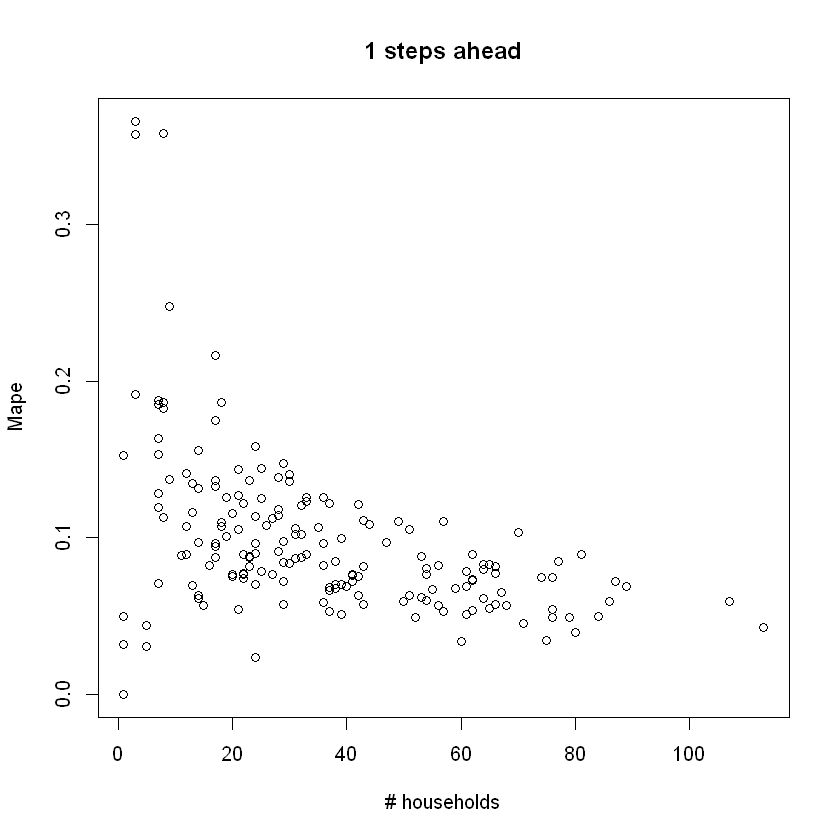

In [167]:
nahead=1
mapes=as.matrix(df[nahead,])
lens=as.matrix(df1[1,])
plot(lens,mapes,xlab='# households',ylab='Mape',main=paste0(toString(nahead),' steps ahead'))

In [278]:
nahead=50
ntests=240
PathToMeterFile = file.path(getwd(),'substation','MeterPointsHvaler.csv')
#PathToMeterFile = file.path(getwd(),'substation','substation_relations.csv')
meters=read.csv(PathToMeterFile,encoding='latin-1')
meters = meters[complete.cases(meters), ]
SubstationIDs = unique(meters$Substati)
#rm(dfbase)

i=1
item = FileList[i]
idtem=gregexpr(pattern ='_',item)
ss=substr(item,1,idtem[[1]][1]-1)
load(file.path(getwd(), 'substation','data','validating',item))
mape1 = matrix(0,nrow=nahead,ncol =ntests-nahead)
    for (i in (1:nahead))
        mape1[i,]=abs((y_test[1,(1+i):(ntests-nahead+i)]-y_test[1,1:(ntests-nahead)])/y_test[1,(1+i):(ntests-nahead+i)])
dfbase<- data.frame(rowMedians(mape1))
colnames(dfbase)<-ss

for (i in seq(2, by=2,length(FileList))){
    #1. Load number of household in each substation
    item = FileList[i]
    idtem=gregexpr(pattern ='_',item)
    ss=substr(item,1,idtem[[1]][1]-1)
    assets=meters[meters['Substation']==ss,'Id'] # take id of all houses registered to ss
    df1[ss]<- data.frame(length(assets))
    #2. Compute the mean Mape of each substation
    load(file.path(getwd(), 'substation','data','validating',item))
    
    mape1 = matrix(0,nrow=nahead,ncol =ntests-nahead)
    for (i in (1:nahead))
        mape1[i,]=abs((y_test[1,(1+i):(ntests-nahead+i)]-y_test[1,1:(ntests-nahead)])/y_test[1,(1+i):(ntests-nahead+i)])
    dfbase[ss]<- data.frame(rowMedians(mape1))
}


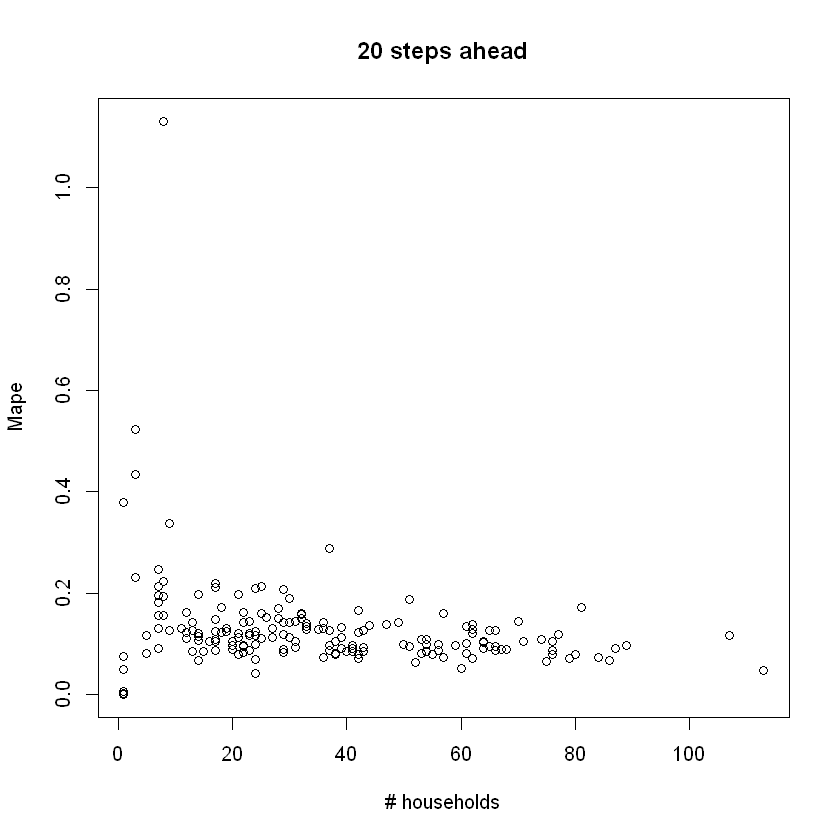

In [287]:
delta=df#-dfbase
nahead=20
mapes=as.matrix(delta[nahead,])
lens=as.matrix(df1[1,])
plot(lens,mapes,xlab='# households',ylab='Mape',main=paste0(toString(nahead),' steps ahead'))

# New substation list

In [403]:
source("https://bioconductor.org/biocLite.R")
biocLite("Biobase")
require(Biobase)
FileList=list.files(file.path(getwd(),'substation','data','new_substations_list'))
PathToMeterFile = file.path(getwd(),'substation','substation_relations.csv')
meters=read.csv(PathToMeterFile,encoding='latin-1')
meters = meters[complete.cases(meters), ]

rm(df)
rm(df1)
i=1
item = FileList[i]
idtem=gregexpr(pattern ='_',item)
ss=substr(item,1,idtem[[1]][1]-1)
load(file.path(getwd(), 'substation','data','new_substations_list',item))
df<- data.frame(rowMedians(mape))
colnames(df)<-ss
assets=meters[meters['SubstationName']==ss,'Id'] # take id of all houses registered to ss
df1<-data.frame(length(assets))
colnames(df1)<-ss
mape0=mape[,1:48]
PathToMeterFile = file.path(getwd(),'substation','substation_relations.csv')
meters=read.csv(PathToMeterFile,encoding='latin-1')
meters = meters[complete.cases(meters), ]
SubstationIDs = unique(meters$SubstationName)

mape0 = mape[,1:48]
for (i in seq(1, by=2,length(FileList))){
    #1. Load number of household in each substation
    item = FileList[i]
    idtem=gregexpr(pattern ='_',item)
    ss=substr(item,1,idtem[[1]][1]-1)
    assets=meters[meters['SubstationName']==ss,'MeterAssetId'] # take id of all houses registered to ss
    df1[ss]<- data.frame(length(assets))
    #2. Compute the mean Mape of each substation
    load(file.path(getwd(), 'substation','data','new_substations_list',item))
    df[ss]<- data.frame(rowMedians(mape[,1:48]))
    #df[ss]<- data.frame(rowMeans(mape))
    mape0=cbind(mape[,1:48],mape0)
    if (max(mape[1,])>40) i0=i
}

Bioconductor version 3.5 (BiocInstaller 1.26.1), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.5 (BiocInstaller 1.26.1), R 3.4.1 (2017-06-30).
Installing package(s) 'Biobase'
Warning message:
"package 'Biobase' is in use and will not be installed"Old packages: 'openssl', 'RcppArmadillo', 'rstudioapi', 'scales', 'shiny',
  'BH', 'boot', 'car', 'caret', 'crayon', 'curl', 'DBI', 'dplyr', 'evaluate',
  'foreign', 'glmnet', 'haven', 'htmlwidgets', 'httpuv', 'httr', 'knitr',
  'Matrix', 'mgcv', 'modelr', 'PKI', 'psych', 'purrr', 'quantmod', 'R6',
  'Rcpp', 'repr', 'rlang', 'rmarkdown', 'rsconnect', 'tibble', 'tidyr', 'TTR',
  'xts'


In [378]:
item=FileList[i0]
load(file.path(getwd(), 'substation','data','new_substations_list',item))

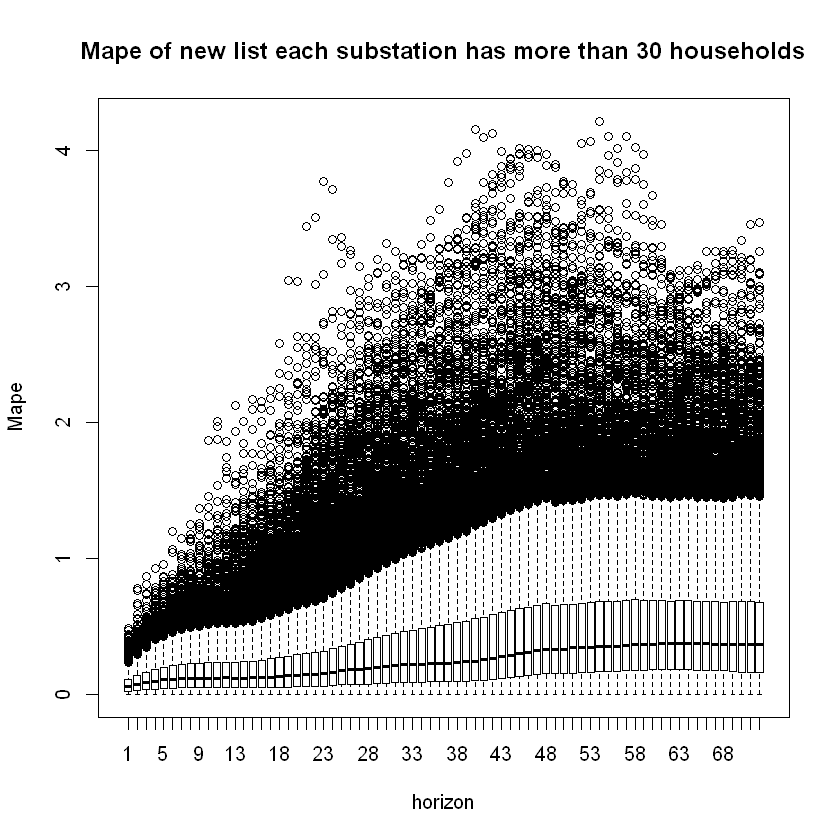

In [421]:
boxplot(t(mape0),main='Mape of new list each substation has more than 30 households',xlab='horizon',ylab='Mape')

Boxplot at each horizon: 48*(number of stations) values

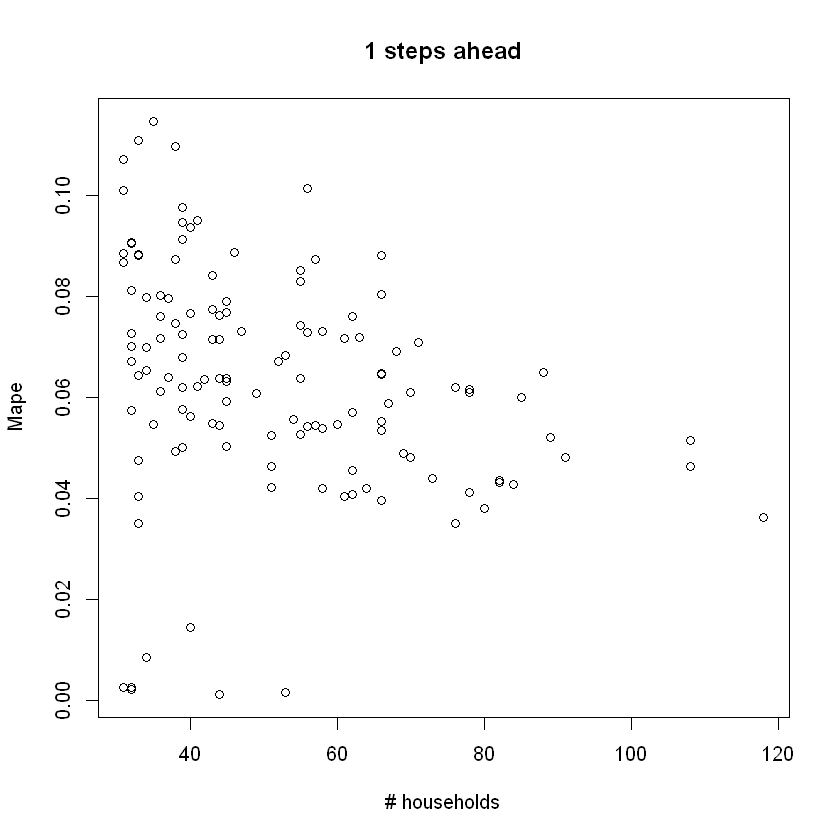

In [423]:
delta=df#-dfbase
nahead=1
mapes=as.matrix(delta[nahead,])
lens=as.matrix(df1[1,])
plot(lens,mapes,xlab='# households',ylab='Mape',main=paste0(toString(nahead),' steps ahead'))

In [411]:
nahead=72
ntests=120
PathToMeterFile = file.path(getwd(),'substation','substation_relations.csv')
meters=read.csv(PathToMeterFile,encoding='latin-1')
meters = meters[complete.cases(meters), ]
SubstationIDs = unique(meters$SubstationName)
#rm(dfbase)

i=1
item = FileList[i]
idtem=gregexpr(pattern ='_',item)
ss=substr(item,1,idtem[[1]][1]-1)
load(file.path(getwd(), 'substation','data','new_substations_list',item))
mape1 = matrix(0,nrow=nahead,ncol =ntests-nahead)
    for (i in (1:nahead))
        mape1[i,]=abs((y_test[1,(1+i):(ntests-nahead+i)]-y_test[1,1:(ntests-nahead)])/y_test[1,(1+i):(ntests-nahead+i)])
dfbase<- data.frame(rowMedians(mape1))
dfbase0=mape1[,1:48]
colnames(dfbase)<-ss

for (i in seq(2, by=2,length(FileList))){
    #1. Load number of household in each substation
    item = FileList[i]
    idtem=gregexpr(pattern ='_',item)
    ss=substr(item,1,idtem[[1]][1]-1)
    assets=meters[meters['SubstationName']==ss,'MeterAssetId'] # take id of all houses registered to ss
    df1[ss]<- data.frame(length(assets))
    #2. Compute the mean Mape of each substation
    #load(file.path(getwd(), 'substation','data','validating',item))
    load(file.path(getwd(), 'substation','data','new_substations_list',item))
    
    mape1 = matrix(0,nrow=nahead,ncol =ntests-nahead)
    for (i in (1:nahead))
        mape1[i,]=abs((y_test[1,(1+i):(ntests-nahead+i)]-y_test[1,1:(ntests-nahead)])/y_test[1,(1+i):(ntests-nahead+i)])
    dfbase[ss]<- data.frame(rowMedians(mape1))
    dfbase0=cbind(dfbase0,mape1[,1:48])
}

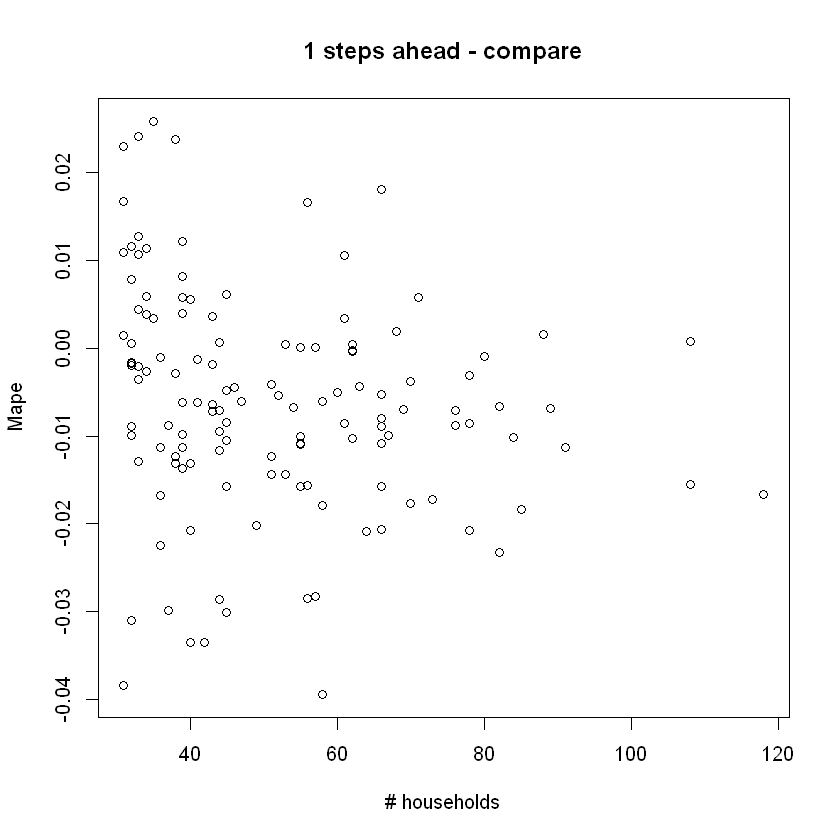

In [429]:
delta=df-dfbase
nahead=1
mapes=as.matrix(delta[nahead,])
lens=as.matrix(df1[1,])
plot(lens,mapes,xlab='# households',ylab='Mape',main=paste0(toString(nahead),' steps ahead - compare'))

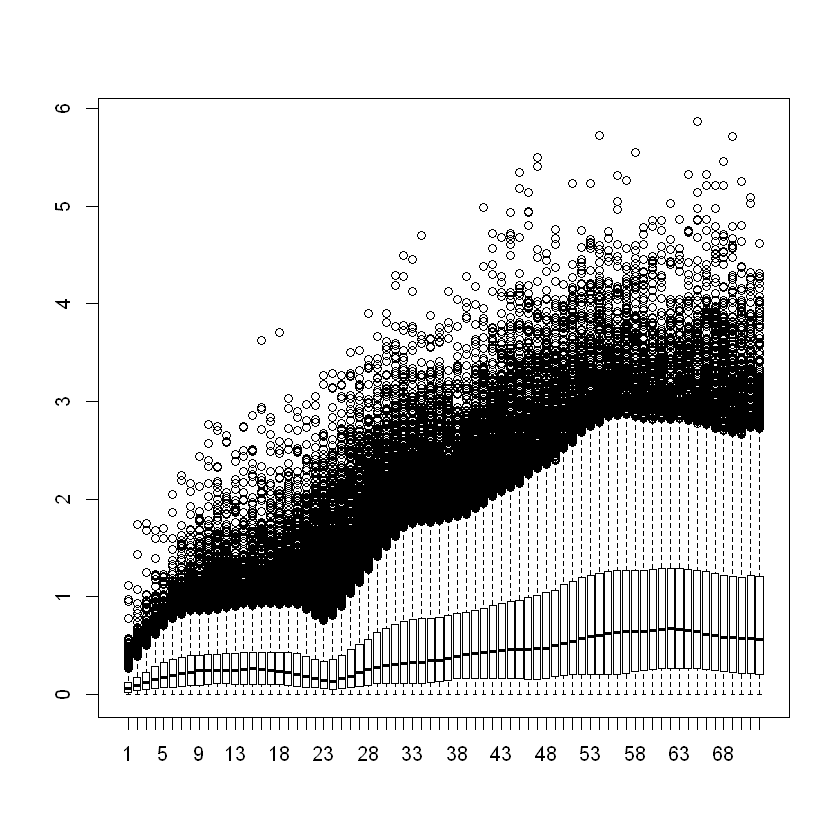

In [414]:
boxplot(t(dfbase0))

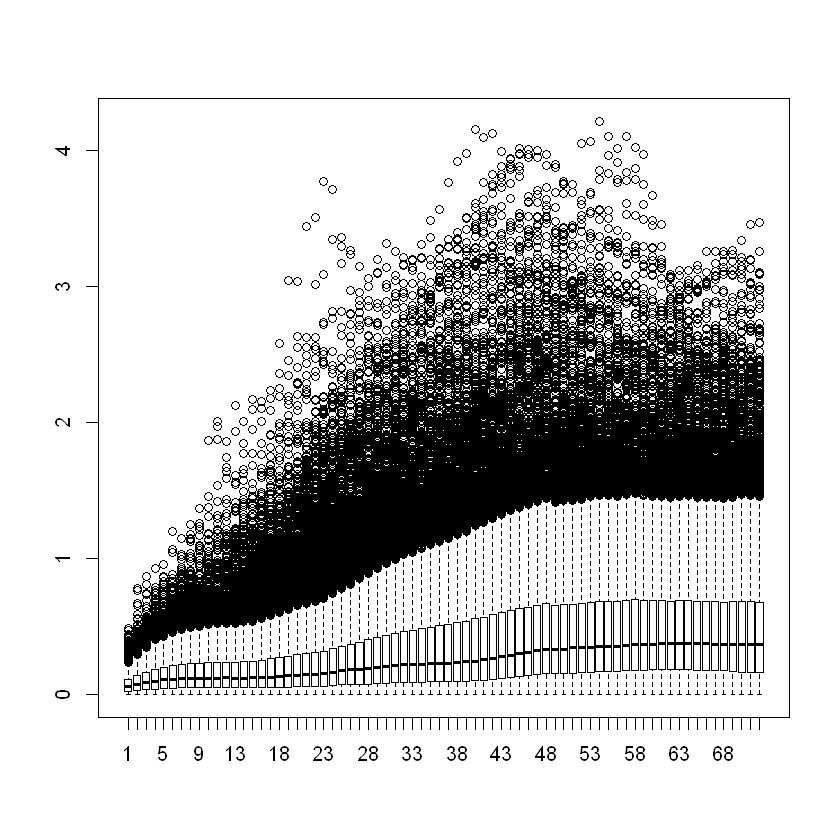

In [415]:
boxplot(t(mape0))

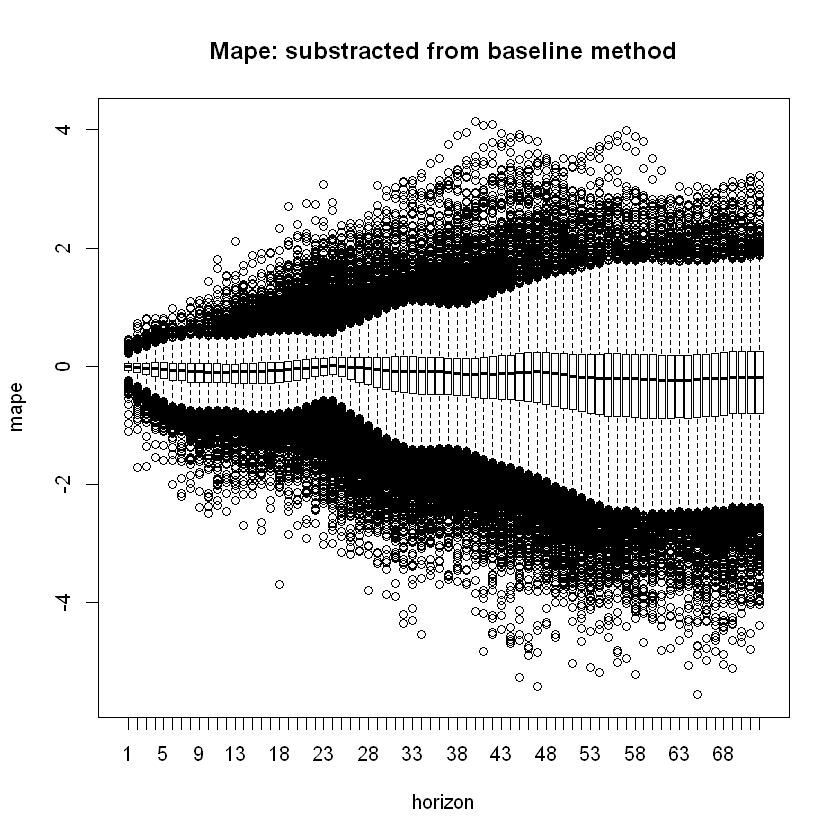

In [419]:
boxplot(t(mape0-dfbase0),main='Mape: substracted from baseline method',xlab='horizon',ylab='mape')